In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma, truncnorm, norm, dirichlet

In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../bayesextremes')

from mgpd import MGPD

(array([392., 464., 131.,  85., 221., 289., 241., 120.,  42.,  15.]),
 array([ 0.43765665,  2.43018466,  4.42271266,  6.41524067,  8.40776867,
        10.40029668, 12.39282468, 14.38535269, 16.37788069, 18.3704087 ,
        20.3629367 ]),
 <BarContainer object of 10 artists>)

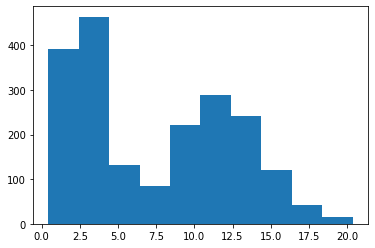

In [3]:
# simulate data from a known mixture distribution
np.random.seed(12345)  # set random seed for reproducibility

k = 1
ndata = 1000
# spread = 5
# centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution

v = np.random.randint(0, k, ndata)
data_1 = np.random.gamma(shape = 5, scale = 0.6, size = ndata)
data_2 = np.random.gamma(shape = 20, scale = 0.6, size = ndata)

data = np.append(data_1, data_2)
plt.hist(data)

In [4]:
prior_values = {}
prior_values['a_prior'] = 1
prior_values['b_prior'] = 1
prior_values['c_prior'] = 1                                         
prior_values['d_prior'] = 1
prior_values['mu_u'] = 1
prior_values['sigma_u'] = 1

mgpd = MGPD(n_iteration = 100, data = data, k=2, prior_values = prior_values)

In [5]:
mgpd.fit()

0
{'current': -10044.434684329157, 'prop': -47905.72842516954}
1
{'current': -48501.598361249984, 'prop': -5564.353334111129}


../bayesextremes/mgpd.py:60: RuntimeWarning: divide by zero encountered in log
  gm_kernel += np.log(p * gamma.pdf(x = x_i, a = eta, scale = mu/eta)).sum()


2
{'current': -45828.46996120966, 'prop': 17632.947149716496}
3


../bayesextremes/mgpd.py:66: RuntimeWarning: invalid value encountered in log
  log_cumulated_prob = len(data_over_u) * np.log(1 - cumulated_prob)
../bayesextremes/mgpd.py:66: RuntimeWarning: divide by zero encountered in log
  log_cumulated_prob = len(data_over_u) * np.log(1 - cumulated_prob)


{'current': nan, 'prop': 9269.666890487373}
4
{'current': 3763.5995733043383, 'prop': -inf}
5
{'current': 4108.039839682039, 'prop': 2855.3504497988474}
6
{'current': 4101.447006016121, 'prop': 1014.4511865531895}
7
{'current': 381.17472590035027, 'prop': 999.4561911455321}
8
{'current': nan, 'prop': nan}
9
{'current': nan, 'prop': nan}
10
{'current': 0.0, 'prop': 0.0}
11
{'current': 0.0, 'prop': 0.0}
12
{'current': 0.0, 'prop': 0.0}
13
{'current': 0.0, 'prop': 0.0}
14
{'current': 0.0, 'prop': 0.0}
15
{'current': 0.0, 'prop': nan}
16
{'current': nan, 'prop': 0.0}
17
{'current': 0.0, 'prop': nan}
18
{'current': nan, 'prop': nan}
19


../bayesextremes/mgpd.py:63: RuntimeWarning: divide by zero encountered in true_divide
  cumulated_prob = (p * gamma.cdf(u, a = eta, scale = mu/eta)).sum()
../bayesextremes/mgpd.py:72: RuntimeWarning: divide by zero encountered in log
  - 0.5 * np.log(1 + 2*csi)))
../bayesextremes/mgpd.py:72: RuntimeWarning: invalid value encountered in double_scalars
  - 0.5 * np.log(1 + 2*csi)))
../bayesextremes/mgpd.py:63: RuntimeWarning: divide by zero encountered in float_scalars
  cumulated_prob = (p * gamma.cdf(u, a = eta, scale = mu/eta)).sum()
../bayesextremes/mgpd.py:72: RuntimeWarning: invalid value encountered in multiply
  - 0.5 * np.log(1 + 2*csi)))
../bayesextremes/mgpd.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  cumulated_prob = (p * gamma.cdf(u, a = eta, scale = mu/eta)).sum()
../bayesextremes/mgpd.py:217: RuntimeWarning: divide by zero encountered in true_divide
  eta_potential = gamma.rvs(a = self.eta_array[s], scale = self.v_eta/(self.eta_array[s])**2)[0]


ValueError: Domain error in arguments.

In [6]:
mgpd.get_eta_chain()

array([[1.0000000e+00, 1.0000000e+00],
       [4.9607234e+00, 4.9607234e+00],
       [4.9607234e+00, 4.9607234e+00],
       [4.9607234e+00, 4.9607234e+00],
       [7.3941773e-01, 7.3941773e-01],
       [7.3941773e-01, 7.3941773e-01],
       [7.3941773e-01, 7.3941773e-01],
       [4.8848848e+00, 4.8848848e+00],
       [1.3793253e+00, 1.3793253e+00],
       [1.8963484e+00, 1.8963484e+00],
       [8.4660685e-01, 8.4660685e-01],
       [8.1639892e-01, 8.1639892e-01],
       [2.0325882e+00, 2.0325882e+00],
       [2.0236731e+00, 2.0236731e+00],
       [2.5454786e+00, 2.5454786e+00],
       [9.6640810e-02, 9.6640810e-02],
       [3.7968079e+02, 3.7968079e+02],
       [1.3380269e-02, 1.3380269e-02],
       [1.7181384e-18, 1.7181384e-18],
       [0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
gamma.rvs(a = 0.1, scale = 1)

In [ ]:
x = np.array([1])
for i, value in enumerate(list(x)):
            if value < 2:
                x[i] = value + 0.001